In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('SpotifyFeatures.csv')

# Display the shape and first few rows
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (22145, 18)


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373.0,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373.0,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267.0,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427.0,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625.0,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
# Dataset info
df.info()

# Check missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values[missing_values > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22145 entries, 0 to 22144
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genre             22145 non-null  object 
 1   artist_name       22145 non-null  object 
 2   track_name        22145 non-null  object 
 3   track_id          22145 non-null  object 
 4   popularity        22145 non-null  int64  
 5   acousticness      22145 non-null  float64
 6   danceability      22145 non-null  float64
 7   duration_ms       22144 non-null  float64
 8   energy            22144 non-null  float64
 9   instrumentalness  22144 non-null  float64
 10  key               22144 non-null  object 
 11  liveness          22144 non-null  float64
 12  loudness          22144 non-null  float64
 13  mode              22144 non-null  object 
 14  speechiness       22144 non-null  float64
 15  tempo             22144 non-null  float64
 16  time_signature    22144 non-null  object

In [6]:
df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [7]:
# Handle 'artists' list format
df['artists'] = df['artist_name'].apply(lambda x: x.strip("[]").replace("'", "").replace(",", " "))

# Combine important features
def create_feature_string(row):
    return f"{row['track_name']} {row['artists']}"

df['combined_features'] = df.apply(create_feature_string, axis=1)


In [8]:
df[['track_name', 'artist_name', 'popularity', 'combined_features']].head()


,track_name,artist_name,popularity,combined_features
0,C'est beau de faire un Show,Henri Salvador,0,C'est beau de faire un Show Henri Salvador
1,Perdu d'avance (par Gad Elmaleh),Martin & les fées,1,Perdu d'avance (par Gad Elmaleh) Martin & les ...
2,Don't Let Me Be Lonely Tonight,Joseph Williams,3,Don't Let Me Be Lonely Tonight Joseph Williams
3,Dis-moi Monsieur Gordon Cooper,Henri Salvador,0,Dis-moi Monsieur Gordon Cooper Henri Salvador
4,Ouverture,Fabien Nataf,4,Ouverture Fabien Nataf


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use('ggplot')
sns.set(rc={"figure.figsize": (12, 6)})


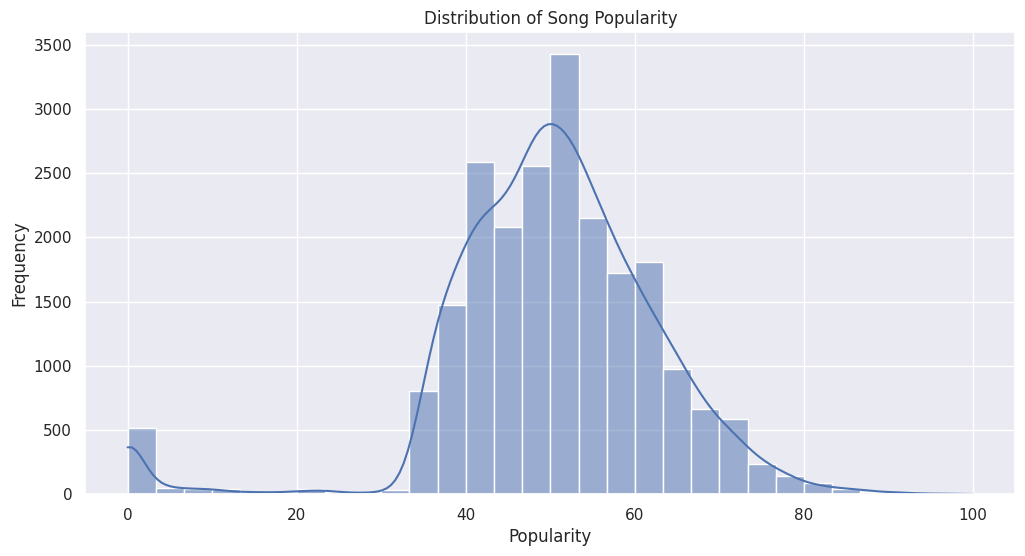

In [10]:
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()


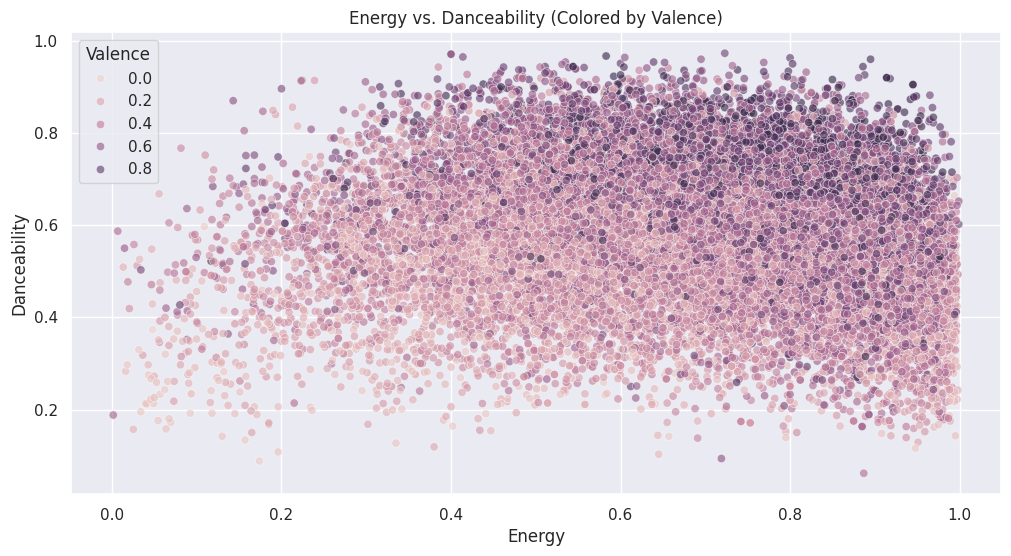

In [12]:
sns.scatterplot(data=df, x='energy', y='danceability', hue='valence', alpha=0.6)
plt.title('Energy vs. Danceability (Colored by Valence)')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.legend(title='Valence')
plt.show()


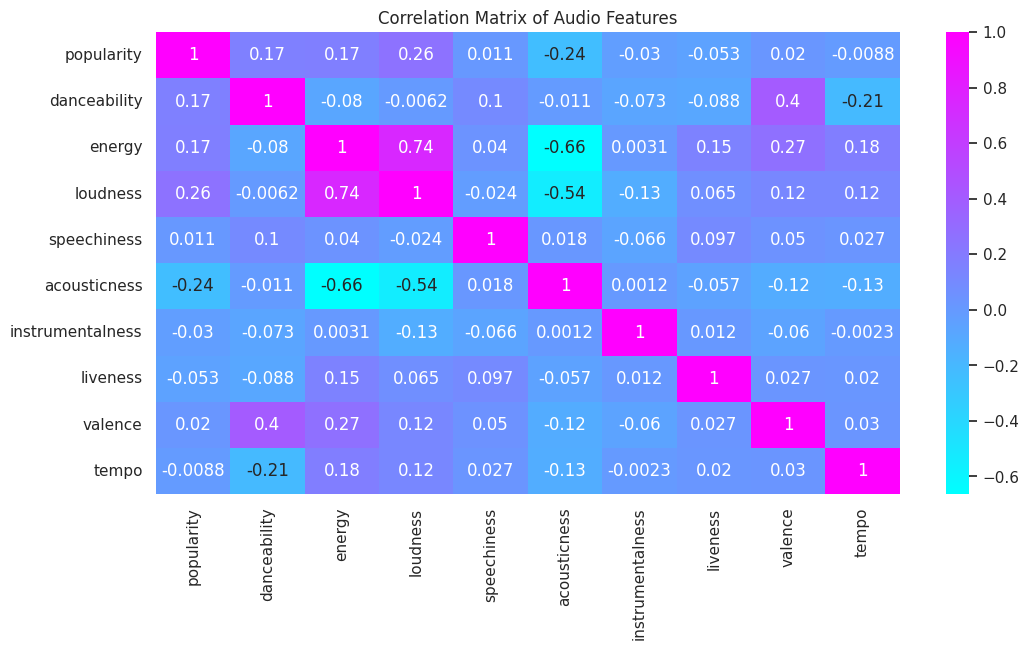

In [13]:
features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

correlation_matrix = df[features].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='cool')
plt.title('Correlation Matrix of Audio Features')
plt.show()


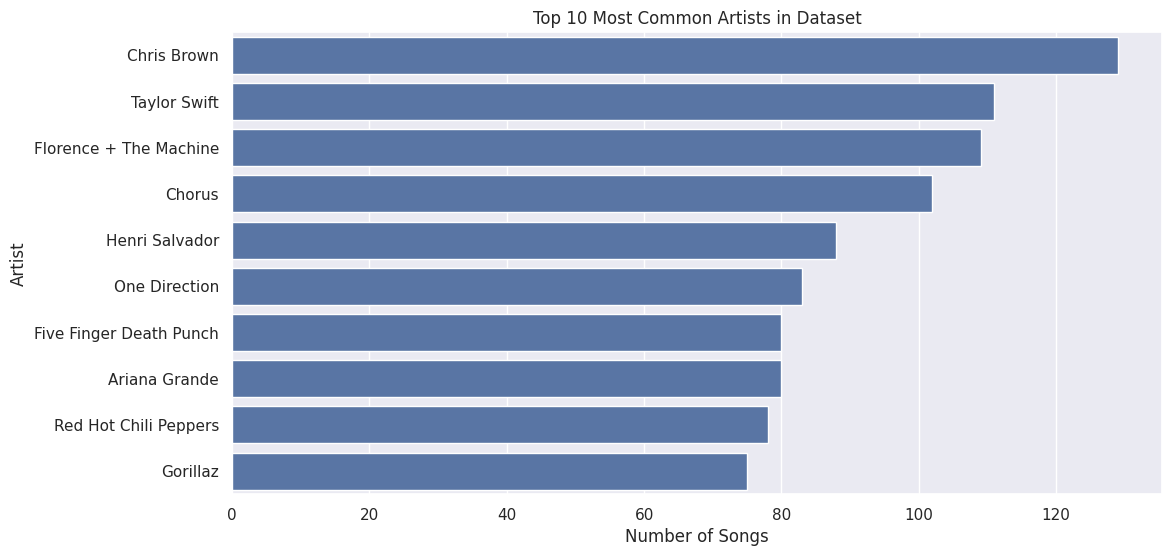

In [14]:
# Count most common artists
from collections import Counter

artist_counts = Counter(df['artists'])
top_artists = dict(artist_counts.most_common(10))

sns.barplot(x=list(top_artists.values()), y=list(top_artists.keys()))
plt.title('Top 10 Most Common Artists in Dataset')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [16]:
# Create TF-IDF matrix from combined features
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

# Check shape of matrix
print("TF-IDF matrix shape:", tfidf_matrix.shape)


TF-IDF matrix shape: (22145, 12261)


In [17]:
# Compute cosine similarity from TF-IDF matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [19]:
# Reset index to access song names
df = df.reset_index()
indices = pd.Series(df.index, index=df['track_name'].str.lower()).drop_duplicates()


In [20]:
def get_recommendations(song_name, num_recommendations=10):
    song_name = song_name.lower()
    if song_name not in indices:
        return f"❌ Song '{song_name}' not found in the dataset."

    idx = indices[song_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:num_recommendations + 1]  # skip the song itself

    song_indices = [i[0] for i in sim_scores]
    return df[['track_name', 'artist_name', 'popularity']].iloc[song_indices]


In [21]:
get_recommendations("Shape of You", 5)


,track_name,artist_name,popularity
3774,Workin' On,Colt Ford,41
2120,Outshine Me,Colt Ford,41
7000,Convoy,Colt Ford,39
13405,The Shape,Slipknot,39
8534,Back (feat. Jake Owen),Colt Ford,36
